## Problem Statement

### Business Context

The healthcare industry is rapidly evolving, with professionals facing increasing challenges in managing vast volumes of medical data while delivering accurate and timely diagnoses. The need for quick access to comprehensive, reliable, and up-to-date medical knowledge is critical for improving patient outcomes and ensuring informed decision-making in a fast-paced environment.

Healthcare professionals often encounter information overload, struggling to sift through extensive research and data to create accurate diagnoses and treatment plans. This challenge is amplified by the need for efficiency, particularly in emergencies, where time-sensitive decisions are vital. Furthermore, access to trusted, current medical information from renowned manuals and research papers is essential for maintaining high standards of care.

To address these challenges, healthcare centers can focus on integrating systems that streamline access to medical knowledge, provide tools to support quick decision-making, and enhance efficiency. Leveraging centralized knowledge platforms and ensuring healthcare providers have continuous access to reliable resources can significantly improve patient care and operational effectiveness.

**Common Questions to Answer**

**1. Diagnostic Assistance**: "What are the common symptoms and treatments for pulmonary embolism?"

**2. Drug Information**: "Can you provide the trade names of medications used for treating hypertension?"

**3. Treatment Plans**: "What are the first-line options and alternatives for managing rheumatoid arthritis?"

**4. Specialty Knowledge**: "What are the diagnostic steps for suspected endocrine disorders?"

**5. Critical Care Protocols**: "What is the protocol for managing sepsis in a critical care unit?"

### Objective

As an AI specialist, your task is to develop a RAG-based AI solution using renowned medical manuals to address healthcare challenges. The objective is to **understand** issues like information overload, **apply** AI techniques to streamline decision-making, **analyze** its impact on diagnostics and patient outcomes, **evaluate** its potential to standardize care practices, and **create** a functional prototype demonstrating its feasibility and effectiveness.

### Data Description

The **Merck Manuals** are medical references published by the American pharmaceutical company Merck & Co., that cover a wide range of medical topics, including disorders, tests, diagnoses, and drugs. The manuals have been published since 1899, when Merck & Co. was still a subsidiary of the German company Merck.

The manual is provided as a PDF with over 4,000 pages divided into 23 sections.

## **Please read the instructions carefully before starting the project.**

This is a commented Python Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_____' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_____' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same. Any mathematical or computational details which are a graded part of the project can be included in the Appendix section of the presentation.

**Note**: If the free-tier GPU of Google Colab is not accessible (due to unavailability or exhaustion of daily limit or other reasons), the following steps can be taken:

1. Wait for 12-24 hours until the GPU is accessible again or the daily usage limits are reset.

2. Switch to a different Google account and resume working on the project from there.

3. Try using the CPU runtime:
    - To use the CPU runtime, click on *Runtime* => *Change runtime type* => *CPU* => *Save*
    - One can also click on the *Continue without GPU* option to switch to a CPU runtime (kindly refer to the snapshot below)
    - The instructions for running the code on the CPU are provided in the respective sections of the notebook.

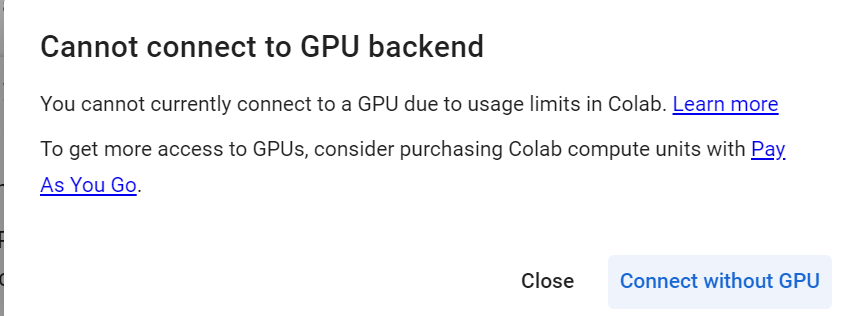

## Installing and Importing Necessary Libraries and Dependencies

In [1]:
# Installation for GPU llama-cpp-python
# uncomment and run the following code in case GPU is being used
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.85 --force-reinstall --no-cache-dir -q

# Installation for CPU llama-cpp-python
# uncomment and run the following code in case GPU is not being used
# !CMAKE_ARGS="-DLLAMA_CUBLAS=off" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.85 --force-reinstall --no-cache-dir -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 36.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 153.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 263.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 284.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 278.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.3.2 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.2 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_versi

In [ ]:
# For installing the libraries & downloading models from HF Hub
!pip install huggingface_hub==0.23.2 pandas==1.5.3 tiktoken==0.6.0 pymupdf==1.25.1 langchain==0.1.1 langchain-community==0.0.13 chromadb==0.4.22 sentence-transformers==2.3.1 numpy==1.25.2 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 1.5 MB

In [ ]:
#Libraries for downloading and loading the llm
from huggingface_hub import hf_hub_download
from llama_cpp import Llama

## Question Answering using LLM

### Downloading and Loading the model

In [ ]:
model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
model_basename = "mistral-7b-instruct-v0.2.Q6_K.gguf"

In [ ]:
model_path = hf_hub_download(
    repo_id= model_name_or_path, #Complete the code to mention the repo id
    filename= model_basename #Complete the code to mention the model name
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


mistral-7b-instruct-v0.2.Q6_K.gguf:   0%|          | 0.00/5.94G [00:00<?, ?B/s]

In [ ]:
#uncomment the below snippet of code if the runtime is connected to GPU.
llm = Llama(
    model_path=model_path,
    n_ctx=2600,
    n_gpu_layers=38,
    n_batch=512
)

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | 


In [ ]:
#uncomment the below snippet of code if the runtime is connected to CPU only.
#llm = Llama(
#    model_path=model_path,
#    n_ctx=1024,
#    n_cores=-2
#)

### Response

In [ ]:
def response(query,max_tokens=128,temperature=0,top_p=0.95,top_k=50):
    model_output = llm(
      prompt=query,
      max_tokens=max_tokens,
      temperature=temperature,
      top_p=top_p,
      top_k=top_k
    )

    return model_output['choices'][0]['text']

In [ ]:
response("What treatment options are available for managing hypertension?")

'\n\nHypertension, or high blood pressure, is a common condition that can increase the risk of various health problems such as heart disease, stroke, and kidney damage. The good news is that there are several effective treatment options available to help manage hypertension and reduce the risk of complications. Here are some of the most commonly used treatments:\n\n1. Lifestyle modifications: Making lifestyle changes is often the first line of defense against hypertension. This may include eating a healthy diet rich in fruits, vegetables, whole grains, and lean proteins; limiting sodium intake; getting regular physical activity'

### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [ ]:
user_input = "What is the protocol for managing sepsis in a critical care unit?"
response(user_input)

Llama.generate: prefix-match hit


'\n\nSepsis is a life-threatening condition that can arise from an infection, and it requires prompt recognition and aggressive management in a critical care unit. The following are general steps for managing sepsis in a critical care unit:\n\n1. Early recognition: Recognize the signs and symptoms of sepsis early and initiate treatment as soon as possible. Sepsis can present with various clinical features, including fever or hypothermia, tachycardia or bradycardia, altered mental status, respiratory distress, and lactic acidosis.\n2. Resusc'

### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [ ]:
user_input_2 = "What are the common symptoms for appendicitis, and can it be cured via medicine? if not, what surgical procedure should be followed to treat it?" #Complete the code to define the query #2
response(user_input_2) #Complete the code to pass the user input

Llama.generate: prefix-match hit


'\n\nAppendicitis is a medical condition characterized by inflammation of the appendix, a small tube-shaped organ located in the lower right side of the abdomen. The symptoms of appendicitis can vary from person to person, but some common signs and symptoms include:\n\n1. Abdominal pain: The pain is typically located in the lower right quadrant of the abdomen and may be dull at first, but it can quickly become sharp and severe. The pain may worsen with movement or pressure on the area.\n2. Loss of appetite: People with appendicitis may lose their'

### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [ ]:
user_input_2 = "What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?" #Complete the code to define the query #3
response(user_input_2) #Complete the code to pass the user input

Llama.generate: prefix-match hit


"\n\nSudden patchy hair loss, also known as alopecia areata, is a common autoimmune disorder that affects the hair follicles. It can result in round or oval bald patches on the scalp, but it can also occur on other parts of the body such as the beard area, eyebrows, or eyelashes.\n\nThe exact cause of alopecia areata is not known, but it's believed to be related to a problem with the immune system. Some possible triggers for this condition include stress, genetics, viral infections, and certain medications."

### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [ ]:
user_input_2 = "What treatments are recommended for a permson who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?" #Complete the code to define the query #4
response(user_input_2) #Complete the code to pass the user input

Llama.generate: prefix-match hit


'\n\nA person who has sustained a physical injury to the brain, resulting in temporary or permanent impairment of brain function, is referred to as having a traumatic brain injury (TBI). The treatment for TBI depends on the severity and location of the injury. Here are some common treatments:\n\n1. Emergency care: If the injury is severe, the person may require emergency care, including surgery to remove hematomas or other clots that can compress the brain. They may also need to be placed in a coma to reduce brain activity and prevent further damage.\n2. Medications: Dep'

### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [ ]:
user_input_2 = "What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery" #Complete the code to define the query #5
response(user_input_2) #Complete the code to pass the user input

Llama.generate: prefix-match hit


"?\n\nFirst and foremost, if you suspect that someone has fractured their leg while hiking, it's essential to ensure their safety and prevent further injury. Here are some necessary precautions:\n\n1. Keep the person calm and still: Encourage them to remain as still as possible to minimize pain and prevent worsening the injury.\n2. Assess the situation: Check for any signs of shock, such as pale skin, rapid heartbeat, or shallow breathing. If you notice these symptoms, seek medical help immediately.\n3. Immobilize the leg: Use a splint,"

## Question Answering using LLM with Prompt Engineering

In [ ]:
system_prompt = "You are an experienced medical assistant specializing in medical diagnosis and treatment. Your primary responsibility is to provide evidence-based recommendations in response to relevant medical inquiries. Ensure all responses are accurate, aligned with established clinical guidelines, and considerate of patient safety. When offering treatment suggestions, cite appropriate medical sources, consider contraindications, and provide alternative options when necessary. Your tone should be professional, empathetic, and clear to assist both healthcare professionals and patients in making informed decisions" #Complete the code to define the system prompt

### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [ ]:
user_input = system_prompt+"\n"+ "What is the protocol for managing sepsis in a critical care unit?"
response(user_input)

Llama.generate: prefix-match hit


'\nSepsis is a life-threatening condition that requires prompt recognition and intervention. In a critical care unit, the management of sepsis involves a multidisciplinary approach aimed at addressing the underlying infection, supporting organ function, and preventing complications. Here are the key steps in managing sepsis in a critical care unit:\n1. Early recognition and diagnosis: Recognize sepsis early based on clinical signs and symptoms such as fever, tachycardia, respiratory distress, altered mental status, and lactic acidosis. Use validated scoring systems like the Sequential Organ'

### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [ ]:
user_input = system_prompt+"\n"+ "What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?" #Complete the code to pass the query #2
response(user_input) #Complete the code to pass the user input

Llama.generate: prefix-match hit


'\n\nAppendicitis is a medical condition characterized by inflammation of the appendix, a small pouch located at the beginning of the large intestine. Common symptoms include:\n1. Abdominal pain, usually starting around the navel and then shifting to the lower right side.\n2. Loss of appetite.\n3. Nausea and vomiting.\n4. Fever.\n5. Constipation or diarrhea.\n6. General feeling of malaise.\n\nAppendicitis cannot be cured via medicine alone as it requires surgical intervention to remove the infl'

### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [ ]:
user_input = system_prompt+"\n"+"What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?" #Complete the code to pass the query #3
response(user_input) #Complete the code to pass the user input

Llama.generate: prefix-match hit


"\n\nSudden patchy hair loss, also known as alopecia areata, is an autoimmune disorder that results in the sudden loss of hair in small patches on the scalp or other areas of the body. The exact cause of alopecia areata is not fully understood, but it's believed to be related to a problem with the immune system.\n\nEffective treatments for addressing sudden patchy hair loss include:\n\n1. Corticosteroids: Topical or injected corticosteroids are often used to treat alopecia areata. They help reduce inflamm"

### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [ ]:
user_input = system_prompt+"\n"+"What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?" #Complete the code to pass the query #4
response(user_input) #Complete the code to pass the user input

Llama.generate: prefix-match hit


'\nAccording to the American Association of Neurological Surgeons (AANS), treatment for a brain injury depends on the severity and location of the injury. For mild traumatic brain injuries, also known as concussions, rest, hydration, and avoiding activities that worsen symptoms are recommended. More severe injuries may require surgical intervention to remove hematomas or repair skull fractures. Rehabilitation therapies such as physical therapy, occupational therapy, speech therapy, and cognitive rehabilitation may be necessary for individuals with impairments in motor function, communication, memory, or other'

### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [ ]:
user_input = system_prompt+"\n"+"What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?" #Complete the code to pass the query #5
response(user_input) #Complete the code to pass the user input

Llama.generate: prefix-match hit


'\nAccording to the American Academy of Orthopaedic Surgeons (AAOS), a fractured leg, also known as a femur or tibia fracture, is a common injury that occurs during hiking due to falls or accidents. The necessary precautions and treatment steps for a person with a fractured leg are as follows:\n1. Assess the severity of the injury: If you suspect a fracture, do not move the person unless it is necessary to prevent further harm or ensure their safety. Call emergency medical services immediately if there are signs of severe bleeding, unconsciousness, or in'

## Data Preparation for RAG

In [ ]:
#Libraries for processing dataframes,text
import json,os
import tiktoken
import pandas as pd

#Libraries for Loading Data, Chunking, Embedding, and Vector Databases
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import PyMuPDFLoader
from langchain_community.embeddings.sentence_transformer import SentenceTransformerEmbeddings
from langchain_community.vectorstores import Chroma

### Loading the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
manual_pdf_path = "/content/drive/MyDrive/Colab Notebooks/ML Case Study Projects/Gen AI Medical Assistant/medical_diagnosis_manual.pdf" #Complete the code to define the file name

In [ ]:
pdf_loader = PyMuPDFLoader(manual_pdf_path)

In [ ]:
manual = pdf_loader.load()

### Data Overview

#### Checking the first 5 pages

In [ ]:
for i in range(5):
    print(f"Page Number : {i+1}",end="\n")
    print(manual[i].page_content,end="\n")

Page Number : 1
darinjswilliams@icloud.com
L0SQI6EBZK
nt for personal use by darinjswilliams@ic
shing the contents in part or full is liable 

Page Number : 2
darinjswilliams@icloud.com
L0SQI6EBZK
This file is meant for personal use by darinjswilliams@icloud.com only.
Sharing or publishing the contents in part or full is liable for legal action.

Page Number : 3
Table of Contents
1
Front    ................................................................................................................................................................................................................
1
Cover    .......................................................................................................................................................................................................
2
Front Matter    ........................................................................................................................................................................

#### Checking the number of pages

In [ ]:
len(manual)

4114

### Data Chunking

In [ ]:
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    encoding_name='cl100k_base',
    chunk_size=512, #Complete the code to define the chunk size
    chunk_overlap= 16 #Complete the code to define the chunk overlap
)

In [ ]:
document_chunks = pdf_loader.load_and_split(text_splitter)

In [ ]:
len(document_chunks)

8508

In [ ]:
document_chunks[0].page_content

'darinjswilliams@icloud.com\nL0SQI6EBZK\nnt for personal use by darinjswilliams@ic\nshing the contents in part or full is liable'

In [ ]:
document_chunks[2].page_content

'Table of Contents\n1\nFront    ................................................................................................................................................................................................................\n1\nCover    .......................................................................................................................................................................................................\n2\nFront Matter    ...........................................................................................................................................................................................\n53\n1 - Nutritional Disorders    ...............................................................................................................................................................\n53\nChapter 1. Nutrition: General Considerations    ...........................................................................................

In [ ]:
document_chunks[3].page_content

"305\nChapter 25. Drugs & the Liver    ................................................................................................................................................\n308\nChapter 26. Alcoholic Liver Disease    ....................................................................................................................................\n314\nChapter 27. Fibrosis & Cirrhosis    ............................................................................................................................................\n322\nChapter 28. Hepatitis    ..................................................................................................................................................................\n333\nChapter 29. Vascular Disorders of the Liver    .....................................................................................................................\n341\nChapter 30. Liver Masses & Granulomas    ...........................................

As expected, there are some overlaps

### Embedding

In [ ]:
embedding_model = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2") #Complete the code to define the model name

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
embedding_1 = embedding_model.embed_query(document_chunks[0].page_content)
embedding_2 = embedding_model.embed_query(document_chunks[1].page_content)

In [ ]:
print("Dimension of the embedding vector ",len(embedding_1))
len(embedding_1)==len(embedding_2)

Dimension of the embedding vector  384


True

In [ ]:
embedding_1,embedding_2

([-0.0975419282913208,
  0.06857021898031235,
  0.08791811764240265,
  -0.027710117399692535,
  0.10688459128141403,
  0.019050290808081627,
  0.07239008694887161,
  0.010848733596503735,
  0.07116647809743881,
  0.029391637071967125,
  0.05357388034462929,
  0.009425213560461998,
  0.021717941388487816,
  -0.042412418872117996,
  -0.04579773172736168,
  -0.03876369819045067,
  -0.04501846432685852,
  0.031491465866565704,
  -0.14119292795658112,
  0.02934725396335125,
  -0.028210733085870743,
  0.011717459186911583,
  -0.00873128604143858,
  -0.002052163239568472,
  -0.039543069899082184,
  0.007040760014206171,
  -0.026234932243824005,
  0.018513526767492294,
  -0.03067534603178501,
  -0.039947759360075,
  0.05875816568732262,
  0.02167886681854725,
  -0.009615014307200909,
  0.05589928850531578,
  0.06481786072254181,
  0.004756685812026262,
  -0.05629393830895424,
  -0.012420224025845528,
  0.010961015708744526,
  -0.05285302549600601,
  -0.025908248499035835,
  -0.0403476953506469

### Vector Database

In [ ]:
out_dir = 'medical_db'

if not os.path.exists(out_dir):
  os.makedirs(out_dir)

In [ ]:
vectorstore = Chroma.from_documents(
    document_chunks, #Complete the code to pass the document chunks
    embedding_model, #Complete the code to pass the embedding model
    persist_directory=out_dir
)

In [ ]:
vectorstore = Chroma(persist_directory=out_dir,embedding_function=embedding_model)

In [ ]:
vectorstore.embeddings

HuggingFaceEmbeddings(client=SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False})
  (2): Normalize()
), model_name='all-MiniLM-L6-v2', cache_folder=None, model_kwargs={}, encode_kwargs={}, multi_process=False)

In [ ]:
vectorstore.similarity_search("What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?",k=5) #Complete the code to pass a query and an appropriate k value

[Document(page_content='(eg, meniscal tears, cartilaginous injuries). Arteriography may be necessary for suspected arterial injuries\n(eg, some popliteal artery injuries). Nerve conduction studies may be indicated for nerve injuries.\nTreatment\n• Treatment of life- or limb-threatening injuries\n• Splinting\n• Definitive treatment (eg, reduction) for certain injuries\n• Rest, ice, compression, and elevation (RICE)\n• Usually immobilization\nIn the emergency department, hemorrhagic shock is treated. Injuries to arteries are repaired surgically\nunless they affect only small arteries with good collateral circulation. Severed nerves are surgically\nrepaired; for neuropraxia and axonotmesis, initial treatment is usually observation, supportive measures,\nand sometimes physical therapy.\nMost injuries, particularly grossly unstable ones, are immobilized immediately by splinting (immobilization\nwith a nonrigid or noncircumferential device) to prevent further injury to soft tissues by unstab

### Retriever

In [ ]:
retriever = vectorstore.as_retriever(
    search_type='similarity',
    search_kwargs={'k': 2} #Complete the code to pass an appropriate k value
)

In [ ]:
rel_docs = retriever.get_relevant_documents("What is the protocol for managing sepsis in a critical care unit") #Complete the code to pass the query
rel_docs

[Document(page_content="16 - Critical Care Medicine\nChapter 222. Approach to the Critically Ill Patient\nIntroduction\nCritical care medicine specializes in caring for the most seriously ill patients. These patients are best\ntreated in an ICU staffed by experienced personnel. Some hospitals maintain separate units for special\npopulations (eg, cardiac, surgical, neurologic, pediatric, or neonatal patients). ICUs have a high\nnurse:patient ratio to provide the necessary high intensity of service, including treatment and monitoring\nof physiologic parameters.\nSupportive care for the ICU patient includes provision of adequate nutrition (see p. 21) and prevention of\ninfection, stress ulcers and gastritis (see p. 131), and pulmonary embolism (see p. 1920). Because 15 to\n25% of patients admitted to ICUs die there, physicians should know how to minimize suffering and help\ndying patients maintain dignity (see p. 3480).\nPatient Monitoring and Testing\nSome monitoring is manual (ie, by di

In [ ]:
model_output = llm(
      "What treatment options are available for managing prediabetics?", #Complete the code to pass the query
      max_tokens=300, #Complete the code to pass the maximum number of tokens
      temperature=0.1, #Complete the code to pass the temperature
    )

Llama.generate: prefix-match hit


In [ ]:
model_output['choices'][0]['text']

"\n\nPrediabetes is a condition where blood sugar levels are higher than normal but not yet high enough to be diagnosed as diabetes. It's estimated that over 84 million adults in the United States have prediabetes, and about 90% of them don't know they have it. Prediabetes increases the risk of developing type 2 diabetes, heart disease, and stroke.\n\nThe good news is that lifestyle changes can help prevent or delay the onset of type 2 diabetes in people with prediabetes. Here are some treatment options for managing prediabetics:\n\n1. Lifestyle modifications: Making healthy lifestyle choices is the first line of defense against prediabetes. This includes eating a healthy diet, getting regular physical activity, losing weight if necessary, and quitting smoking. A registered dietitian or certified diabetes educator can help create a personalized meal plan that focuses on whole foods, lean proteins, fruits, vegetables, and healthy fats. Regular physical activity, such as brisk walking fo

The above response is somewhat generic and is solely based on the data the model was trained on, rather than the medical manual.  

Let's now provide our own context.

### System and User Prompt Template

Prompts guide the model to generate accurate responses. Here, we define two parts:

    1. The system message describing the assistant's role.
    2. A user message template including context and the question.

In [ ]:
qna_system_message = """You are a medical AI assistant providing expert-level insights based on trusted sources, primarily referencing the Merck Manuals.
 Your responses should be accurate, concise, and formatted for easy comprehension.

 When answering medical inquiries, ensure that responses are grounded in authoritative medical guidelines,
 clearly distinguishing between general information and situations requiring professional consultation.

 Do not provide personal medical advice or diagnoses."""
 #Complete the code to define the system message

In [ ]:
qna_user_message_template = """This context will being with the token:###Context
Here is relevant medical information sourced from the Merck Manuals:
---
###Context
{context}
---

Based on this authoritative knowledge, please provide an answer to the following medical query:
###Question
{question}"""
 #Complete the code to define the user message


### Response Function

In [ ]:
def generate_rag_response(user_input,k=3,max_tokens=128,temperature=0,top_p=0.95,top_k=50):
    global qna_system_message,qna_user_message_template
    # Retrieve relevant document chunks
    relevant_document_chunks = retriever.get_relevant_documents(query=user_input,k=k)
    context_list = [d.page_content for d in relevant_document_chunks]

    # Combine document chunks into a single context
    context_for_query = ". ".join(context_list)

    user_message = qna_user_message_template.replace('{context}', context_for_query)
    user_message = user_message.replace('{question}', user_input)

    prompt = qna_system_message + '\n' + user_message

    # Generate the response
    try:
        response = llm(
                  prompt=prompt,
                  max_tokens=max_tokens,
                  temperature=temperature,
                  repeat_penalty=1.15,
                  top_p=top_p,
                  top_k=top_k
                  )

        # Extract and print the model's response
        response = response['choices'][0]['text'].strip()
    except Exception as e:
        response = f'Sorry, I encountered the following error: \n {e}'

    return response

## Question Answering using RAG

### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [ ]:
user_input = "What is the protocol for managing sepsis in a critical care unit?"
generate_rag_response(user_input,top_k=20)

Llama.generate: prefix-match hit


'###Answer\nSepsis is a life-threatening condition that requires prompt recognition and intervention. In a critical care unit, managing sepsis involves several steps:\n1. First aid: Keep the patient warm and control hemorrhage if present. Check the airway and ventilation, providing respiratory assistance as necessary. Nothing should be given by mouth, and the head should be turned to prevent aspiration if emesis occurs.\n2. Begin treatment simultaneously with evaluation: Provide supplemental oxygen via face mask, and intubate and mechanically ventilate if severe or inadequate'

### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [ ]:
user_input_2 = "What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?" #Complete the code to pass the query #2
generate_rag_response(user_input_2, top_k=20) #Complete the code to pass the user input

Llama.generate: prefix-match hit


"The common symptoms of appendicitis include epigastric or periumbilical pain followed by brief nausea, vomiting, anorexia; after a few hours, the pain shifts to the right lower quadrant. Pain increases with cough and motion. Classic signs are right lower quadrant direct and rebound tenderness located at McBurney's point (junction of the middle and outer thirds of the line joining the umbilicus to the anterior superior spine). Additional signs include pain felt in the right lower quadrant with palpation of the left lower quadrant (Rov"

### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [ ]:
user_input_2 = "What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?" #Complete the code to pass the query #3
generate_rag_response(user_input_2, top_k=20) #Complete the code to pass the user input

Llama.generate: prefix-match hit


'Answer:\nSudden patchy hair loss, also known as alopecia areata, is a common autoimmune disorder that affects genetically susceptible individuals. The exact cause of this condition remains unclear but environmental triggers may play a role. In this condition, the immune system attacks the hair follicles, leading to sudden and patchy hair loss on the scalp or other areas with hair growth.\n\nThere is no definitive cure for alopecia areata, but various treatments can help promote regrowth of hair or slow down further hair loss:\n1.'

### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [ ]:
user_input_2 = "What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?" #Complete the code to pass the query #4
generate_rag_response(user_input_2) #Complete the code to pass the user input

Llama.generate: prefix-match hit


'Answer:\nThe Merck Manuals suggest that there is no specific treatment for traumatic brain injuries (TBIs), but supportive care is essential. This includes preventing systemic complications such as pneumonia, urinary tract infections (UTIs), and thromboembolic diseases. Proper nutrition and pressure ulcer prevention are also crucial aspects of supportive care. For patients whose coma lasts beyond 24 hours, a prolonged period of rehabilitation is often necessary, particularly in cognitive and emotional areas. Rehabilitation services should be planned early. The prognosis for'

### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [ ]:
user_input_2 = "What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?" #Complete the code to pass the query #5
generate_rag_response(user_input_2) #Complete the code to pass the user input

Llama.generate: prefix-match hit


'According to the Merck Manuals, for a person with a fractured leg, the following steps should be taken:\n1. Treatment of life-threatening injuries: If there are any signs of severe bleeding or shock, seek immediate medical attention.\n2. Splinting: Immediately immobilize the injured leg using a nonrigid splint to prevent further injury and decrease pain. This can help prevent fat embolism in long-bone fractures.\n3. Definitive treatment: Depending on the severity of the fracture, definitive treatment may involve reduction'

### Fine-tuning

#### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [ ]:
user_input = "What is the protocol for managing sepsis in a critical care unit?"
generate_rag_response(user_input,temperature=0.3)

Llama.generate: prefix-match hit


'According to the Merck Manuals, sepsis is a serious condition that requires prompt treatment in a critical care unit. The management of sepsis includes providing adequate supportive care such as maintaining body temperature and preventing infection, stress ulcers, gastritis, and pulmonary embolism. Monitoring vital signs, quantifying fluid intake and output, and performing daily weight checks are essential. Continuous monitoring using complex devices is also necessary to detect any physiologic parameter abnormalities promptly.\nBlood tests, including electrolytes and a complete blood count (CBC), should be done'

#### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [ ]:
user_input_2 = "What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it" #Complete the code to pass the query #2
generate_rag_response(user_input_2, temperature=0.7) #Complete the code to pass the user input along with the parameters

Llama.generate: prefix-match hit


'?\nAppendicitis is a medical condition characterized by inflammation of the vermiform appendix. The common symptoms include epigastric or periumbilical pain, anorexia (loss of appetite), and abdominal tenderness. The pain often shifts to the right lower quadrant, and it may increase with coughing or movement. Additional signs could be Rovsing sign (pain felt in the right lower quadrant when palpating the left lower quadrant), psoas sign (increased pain from passive extension of the right hip joint), or obturator sign (pain'

#### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [ ]:
user_input_2 = "What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?" #Complete the code to pass the query #3
generate_rag_response(user_input_2, temperature=0.5) #Complete the code to pass the user input along with the parameters

Llama.generate: prefix-match hit


'Answer:\nSudden patchy hair loss, also known as alopecia areata, is a common autoimmune disorder that affects genetically susceptible individuals. The exact cause of this condition remains unclear but environmental triggers may play a role. In this condition, the immune system attacks the hair follicles, causing sudden hair loss in patches or even total baldness (alopecia universalis) for some people.\n\nThe treatments for alopecia areata focus on promoting regrowth and preventing further hair loss:\n1. Topical corticosteroids: These'

#### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [ ]:
user_input_2 = "What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?" #Complete the code to pass the query #4
generate_rag_response(user_input_2, temperature=0.6) #Complete the code to pass the user input along with the parameters

Llama.generate: prefix-match hit


'Answer:\nFor individuals with brain injuries leading to impaired brain function, there is no specific cure. However, supportive care plays a crucial role in their recovery process. This includes preventing systemic complications such as pneumonia, urinary tract infections (UTIs), and thromboembolic diseases. Providing good nutrition and preventing pressure ulcers are also essential parts of the treatment plan. Early planning for rehabilitation services is important, especially for those with prolonged comas, as they may require extensive assistance in cognitive and emotional areas. The Merck Manuals suggest that about 50'

#### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [ ]:
user_input_2 = "What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?" #Complete the code to pass the query #5
generate_rag_response(user_input_2, temperature=0.5) #Complete the code to pass the user input along with the parameters

Llama.generate: prefix-match hit


'The individual with a fractured leg from a hiking accident requires immediate attention. The first priority is assessing for any life-threatening injuries or complications such as hemorrhagic shock, arterial damage, or nerve injury. If there are no signs of these conditions, the following steps can be taken:\n1. Immobilize the leg to prevent further injury and decrease pain by using a splint or sling for dislocations, and maintaining reduction with casting for fractures.\n2. Apply RICE (rest, ice, compression, elevation) principles to minimize swelling and promote'

## Output Evaluation

Let us now use the LLM-as-a-judge method to check the quality of the RAG system on two parameters - retrieval and generation.

- We are using the same Mistral model for evaluation, so basically here the llm is rating itself on how well he has performed in the task.

In [ ]:
groundedness_rater_system_message = """
You will be presented a ###Question, ###Context used by the AI system and AI generated ###Answer.

Your task is to judge the extent to which the ###Answer is derived from ###Context.

Rate it 1 - if The ###Answer is not derived from the ###Context at all
Rate it 2 - if The ###Answer is derived from the ###Context only to a limited extent
Rate it 3 - if The ###Answer is derived from ###Context to a good extent
Rate it 4 - if The ###Answer is derived from ###Context mostly
Rate it 5 - if The ###Answer is is derived from ###Context completely

Please note: Make sure you give a single overall rating in the range of 1 to 5 along with an overall explanation.

""" #Complete the code to define the prompt to evaluate groundedness

In [ ]:
relevance_rater_system_message = """
You will be presented with a ###Question, the ###Context used by the AI system to generate a response, and the AI-generated ###Answer.

Your task is to judge the extent to which the ###Answer is relevant to the ###Question, considering whether it directly addresses the key aspects of the ###Question based on the provided ###Context.

Rate the relevance as follows:
- Rate 1 – The ###Answer is not relevant to the ###Question at all.
- Rate 2 – The ###Answer is only slightly relevant to the **###Question**, missing key aspects.
- Rate 3 – The ###Answer is moderately relevant, addressing some parts of the **###Question** but leaving out important details.
- Rate 4 – The ###Answer is mostly relevant, covering key aspects but with minor gaps.
- Rate 5 – The ###Answer is fully relevant, directly answering all important aspects of the **###Question** with appropriate details from the **###Context**.

Note: Provide a single overall rating in the range of 1 to 5, along with a brief explanation of why you assigned that score.
""" #Complete the code to define the prompt to evaluate relevance

In [ ]:
user_message_template = """
###Question
{question}

###Context
{context}

###Answer
{answer}
"""

In [ ]:
def generate_ground_relevance_response(user_input,k=3,max_tokens=128,temperature=0,top_p=0.95,top_k=50):
    global qna_system_message,qna_user_message_template
    # Retrieve relevant document chunks
    relevant_document_chunks = retriever.get_relevant_documents(query=user_input,k=3)
    context_list = [d.page_content for d in relevant_document_chunks]
    context_for_query = ". ".join(context_list)

    # Combine user_prompt and system_message to create the prompt
    prompt = f"""[INST]{qna_system_message}\n
                {'user'}: {qna_user_message_template.format(context=context_for_query, question=user_input)}
                [/INST]"""

    response = llm(
            prompt=prompt,
            max_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            top_k=top_k,
            stop=['INST'],
            echo=False
            )

    answer =  response["choices"][0]["text"]

    # Combine user_prompt and system_message to create the prompt
    groundedness_prompt = f"""[INST]{groundedness_rater_system_message}\n
                {'user'}: {user_message_template.format(context=context_for_query, question=user_input, answer=answer)}
                [/INST]"""

    # Combine user_prompt and system_message to create the prompt
    relevance_prompt = f"""[INST]{relevance_rater_system_message}\n
                {'user'}: {user_message_template.format(context=context_for_query, question=user_input, answer=answer)}
                [/INST]"""

    response_1 = llm(
            prompt=groundedness_prompt,
            max_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            top_k=top_k,
            stop=['INST'],
            echo=False
            )

    response_2 = llm(
            prompt=relevance_prompt,
            max_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            top_k=top_k,
            stop=['INST'],
            echo=False
            )

    return response_1['choices'][0]['text'],response_2['choices'][0]['text']

### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [ ]:
ground,rel = generate_ground_relevance_response(user_input="What is the protocol for managing sepsis in a critical care unit?",max_tokens=370, k=1)

print(ground,end="\n\n")
print(rel)

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


 Rating: 5 - The Answer is derived from the Context completely.

Explanation: The Context provides detailed information about the management of critically ill patients in an ICU setting, including the general approach to managing shock and sepsis. The Answer summarizes these steps accurately and specifically mentions the protocol for managing sepsis as outlined in the Merck Manuals, which is referenced in the Context.

 Rating: 5

Explanation: The provided answer directly addresses all important aspects of the question regarding the protocol for managing sepsis in a critical care unit. It covers first aid measures, initial assessment, fluid resuscitation, airway and ventilation management, intravenous access, and medications and monitoring. The information is derived from the context, specifically the section on "Prognosis and Treatment" of sepsis.


### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [ ]:
ground,rel = generate_ground_relevance_response(user_input="What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?",max_tokens=370) #Complete the code to pass the query #2 along with parameters if needed

print(ground,end="\n\n")
print(rel)

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


 Rating: 5 - The AI generated answer is completely derived from the context. The context provides detailed information about the symptoms, signs, diagnosis, etiology, and treatment of appendicitis. The AI answer accurately summarizes this information and includes all the key points mentioned in the context. Additionally, the AI answer also mentions that the standard treatment for appendicitis is surgical removal, which is explicitly stated in the context. Therefore, the AI generated answer is a comprehensive and accurate reflection of the information provided in the context.

 Rating: 5

Explanation: The AI-generated answer directly addresses all important aspects of the question by providing a detailed explanation of the common symptoms of appendicitis and stating that it cannot be cured via medicine alone, but requires surgical removal (appendectomy). The answer also mentions the standard treatment procedure for appendicitis and the potential complications if diagnosis is delayed. Th

### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [ ]:
ground,rel = generate_ground_relevance_response(user_input="What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?",max_tokens=370) #Complete the code to pass the query #3 along with parameters if needed

print(ground,end="\n\n")
print(rel)

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


 Rating: 5 - The Answer is derived from the Context completely.

Explanation: The context provides detailed information about various types of alopecia, including alopecia areata, which is described as a sudden patchy hair loss disorder. The text also mentions that alopecia areata is an autoimmune disorder and discusses possible treatments for this condition, such as corticosteroids, minoxidil, and DPCP. The Answer summarizes these points and provides additional details about the effectiveness of each treatment option.

 Rating: 5

Explanation: The AI-generated answer directly addresses both parts of the question. It explains that sudden patchy hair loss, also known as alopecia areata, is a common autoimmune disorder causing hair loss from the scalp or other areas of the body. Additionally, it provides a list of effective treatments for addressing this condition, including topical and injected corticosteroids, minoxidil, DPCP, systemic corticosteroids, and JAK inhibitors. The answer al

### Query 4: What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [ ]:
ground,rel = generate_ground_relevance_response(user_input="What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?",max_tokens=370) #Complete the code to pass the query #4 along with parameters if needed

print(ground,end="\n\n")
print(rel)

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


 Rating: 5 - The Answer is derived from the Context completely.

Explanation: The Context provides detailed information about the treatments and prognosis for a person with a brain injury, including supportive care measures to prevent complications and the importance of early rehabilitation planning. The Answer accurately summarizes this information and adds that consulting healthcare professionals is necessary for personalized medical advice and treatment options.

 Rating: 5

Explanation: The AI-generated answer directly addresses the key aspects of the question by summarizing the recommended treatments for brain injury patients from the provided context, which includes supportive care measures to prevent complications and ensure proper nutrition and pressure ulcer prevention. It also acknowledges that there is no specific treatment to restore brain function but emphasizes the importance of early rehabilitation planning. The answer also provides some insight into the varying prognosi

### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [ ]:
ground,rel = generate_ground_relevance_response(user_input="What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?",max_tokens=370) #Complete the code to pass the query #5 along with parameters if needed

print(ground,end="\n\n")
print(rel)

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


 I would rate the answer a 5. The context provided in the Merck Manuals was extensive and covered various aspects of treating injuries, including fractures. The answer accurately summarized the recommended precautions and treatment steps for someone who has fractured their leg during hiking, which were directly derived from the context. The answer also referenced specific information from the context, such as the use of splinting, pain management with opioids, and rehabilitation exercises.

 Rating: 5

Explanation: The AI-generated answer directly addresses all important aspects of the question based on the provided context. It covers the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, including assessing the severity of the injury, immobilizing the injured leg, treating pain, resting and elevating the injured leg, applying ice and compression, and considering rehabilitation. The answer also provides specific recommendations base

## Actionable Insights and Business Recommendations

Executive Summary<br><br>


Question Answering using LLM<br>

What is the protocol for managing sepsis in a critical care unit?<br>


Sepsis is a life-threatening condition that can arise from an infection, and it requires prompt recognition and aggressive management in a critical care unit. The following are general steps for managing sepsis in a critical care unit:<br>

1. Early recognition: Recognize the signs and symptoms of sepsis early and initiate treatment as soon as possible. Sepsis can present with various clinical features, including fever or hypothermia, tachycardia or bradycardia, altered mental status, respiratory distress, and lactic acidosis.
2. Resusc<br><br>


Question Answering using LLM with Prompt Engineering<br>
What is the protocol for managing sepsis in a critical care unit?<br>

Sepsis is a life-threatening condition that requires prompt recognition and intervention. In a critical care unit, the management of sepsis involves a multidisciplinary approach aimed at addressing the underlying infection, supporting organ function, and preventing complications. Here are the key steps in managing sepsis in a critical care unit:<br>

1. Early recognition and diagnosis: Recognize sepsis early based on clinical signs and symptoms such as fever, tachycardia, respiratory distress, altered mental status, and lactic acidosis. Use validated scoring systems like the Sequential Organ<br><br>

Question Answering using RAG<br>

What is the protocol for managing sepsis in a critical care unit?<br>
The management of sepsis in a critical care unit involves several key steps:
1. Early recognition and evaluation: Sepsis should be suspected based on clinical signs such as fever, chills, rapid heart rate, rapid breathing, confusion, or low blood pressure. Patients with suspected sepsis should undergo a thorough examination, including assessment for infection sources. Laboratory tests, such as urinalysis, urine culture, serial blood cultures, and measurement of procalcitonin and C-reactive protein levels, may be helpful in confirming the diagnosis.
2. Supportive care: This<br><br>

Fine-tuning<br>
What is the protocol for managing sepsis in a critical care unit?<br>
The management of sepsis in a critical care unit involves several key steps:
1. Early recognition and evaluation: Sepsis should be suspected based on clinical signs such as fever, chills, rapid heart rate, rapid breathing, confusion, or low blood pressure. Diagnosis is ultimately clinical, but laboratory tests including urinalysis, urine culture, serial blood cultures, and cultures of other suspect body fluids can help identify the source of infection.
2. Supportive care: This includes providing adequate nutrition, preventing infection (through strict hand hygiene practices, use of sterile equipment, and monitoring



*   
*  
*



<font size=6 color='blue'>Power Ahead</font>
___